In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso,LinearRegression as LR 
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, train_test_split as TTS
import matplotlib.pyplot as plt 

In [2]:
X = pd.DataFrame(load_boston().data,columns = load_boston().feature_names)
y = load_boston().target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=1912) 

In [3]:
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 岭回归ridge

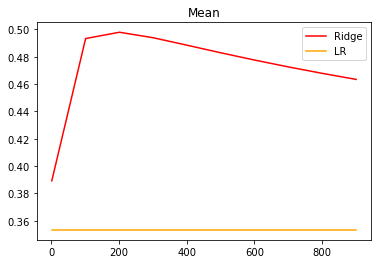

In [4]:
#查看R2的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange: 
    reg = Ridge(alpha=alpha)
    linear = LR()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean() 
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean() 
    ridge.append(regs)
    lr.append(linears) 

plt.plot(alpharange,ridge,color="red",label="Ridge")    
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Mean")
plt.legend() 
plt.show()



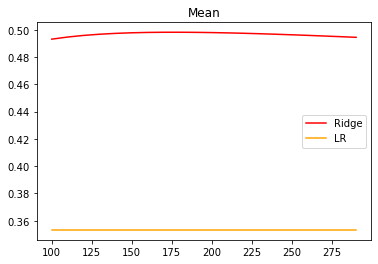

In [5]:
#细化学习曲线
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange: 
    reg = Ridge(alpha=alpha)
    linear = LR()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean() 
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean() 
    ridge.append(regs)
    lr.append(linears) 
    
plt.plot(alpharange,ridge,color="red",label="Ridge") 
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Mean")
plt.legend()
plt.show()

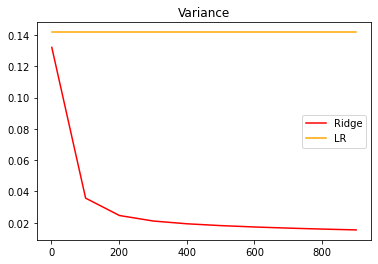

In [6]:
alpharange = np.arange(1,1001,100) 
ridge, lr = [], []
for alpha in alpharange: 
    reg = Ridge(alpha=alpha)
    linear = LR()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var() 
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var() 
    ridge.append(varR)
    lr.append(varLR) 
    
plt.plot(alpharange,ridge,color="red",label="Ridge") 
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Variance")
plt.legend() 
plt.show()

### Lasso 

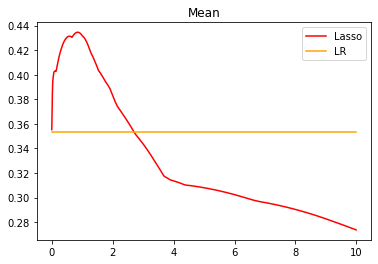

In [7]:
alpharange = np.arange(0.001,10,0.01)
lasso, lr = [], []
for alpha in alpharange: 
    reg = Lasso(alpha=alpha)
    linear = LR()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean() 
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean() 
    lasso.append(regs)
    lr.append(linears) 

plt.plot(alpharange,lasso,color="red",label="Lasso")    
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Mean")
plt.legend() 
plt.show()


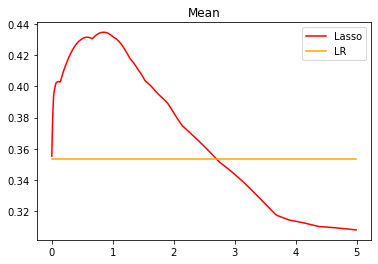

In [8]:
alpharange = np.arange(0.001,5,0.01)
ridge, lr = [], []
for alpha in alpharange: 
    reg = Lasso(alpha=alpha)
    linear = LR()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean() 
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean() 
    ridge.append(regs)
    lr.append(linears) 

plt.plot(alpharange,ridge,color="red",label="Lasso")    
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Mean")
plt.legend() 
plt.show()



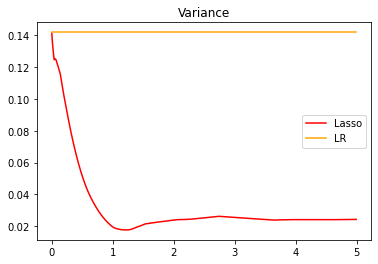

In [9]:
alpharange = np.arange(0.001,5,0.01)
lasso, lr = [], []
for alpha in alpharange: 
    reg = Lasso(alpha=alpha)
    linear = LR()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var() 
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var() 
    lasso.append(varR)
    lr.append(varLR) 
    
plt.plot(alpharange,lasso,color="red",label="Lasso") 
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Variance")
plt.legend() 
plt.show()

### 多项式升维

In [10]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree=2).fit(Xtrain)

In [11]:
x_train_poly = poly.transform(Xtrain)
x_test_poly = poly.transform(Xtest)

In [12]:
reg_ploy = LR().fit(x_train_poly,Ytrain) 
yhat_ploy = reg_ploy.predict(x_test_poly)

In [13]:
reg_ploy.score(x_test_poly,Ytest)

0.50379928307739

In [14]:
reg_ploy.score(x_train_poly,Ytrain)

0.8788604778845595

In [15]:
reg_ploy.coef_

array([ 2.20852288e+09, -1.43496650e+00,  4.30633818e-01, -3.12910134e+00,
        5.22369934e+01, -1.88577979e+01,  1.36493782e+01,  1.01548799e+00,
       -3.33939658e+00,  1.77385544e+00, -9.76526322e-02, -3.30855173e+00,
       -1.32723928e-01,  1.04375941e-01, -7.67274759e-04,  6.03319753e-01,
        2.64879764e-01,  1.09373012e+00, -9.96531841e-01,  4.38885472e-01,
       -6.24883994e-03, -5.79685920e-01,  5.71604852e-01, -4.29099444e-02,
        5.28228674e-01, -4.50066475e-04,  2.54387242e-02, -2.04964778e-03,
       -1.00294285e-02,  1.15552281e-01, -1.24021569e+00,  5.83559615e-03,
        4.84879460e-03,  3.95964814e-02,  8.98873089e-04,  1.03754607e-03,
       -1.58750420e-02,  1.64606895e-04, -3.99033604e-02,  5.17251014e-02,
       -1.40565231e-01, -1.78901335e-01,  7.73324447e-01,  1.38224649e-03,
       -3.80030106e-02,  2.67409505e-02, -4.57291181e-04, -4.38459520e-02,
       -3.92210696e-03, -7.29703648e-03,  5.22369934e+01, -5.77837934e+01,
       -6.51632075e+00,  

In [16]:
ridge_ploy = Ridge().fit(x_train_poly,Ytrain) 
yhat_ploy_ridge = ridge_ploy.predict(x_test_poly)

In [17]:
ridge_ploy.score(x_test_poly,Ytest)

0.7370854135787039

In [18]:
ridge_ploy.score(x_train_poly,Ytrain)

0.93425389320306

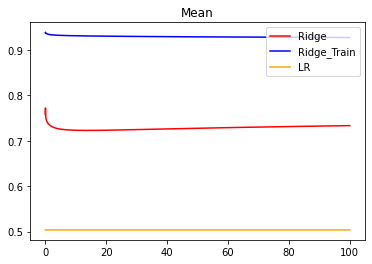

In [19]:
alpharange = np.arange(0,100,0.01)
ridge, lr, ridge_trian = [], [],[]
for alpha in alpharange:     
    linear = LR().fit(x_train_poly,Ytrain)
    ridge_ploy = Ridge(alpha=alpha).fit(x_train_poly,Ytrain) 
    regs = ridge_ploy.score(x_test_poly,Ytest)
    regs_train = ridge_ploy.score(x_train_poly,Ytrain)
    linears = linear.score(x_test_poly,Ytest)
    ridge.append(regs)
    ridge_trian.append(regs_train)
    lr.append(linears) 

plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,ridge_trian,color="blue",label="Ridge_Train")
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Mean")
plt.legend() 
plt.show()


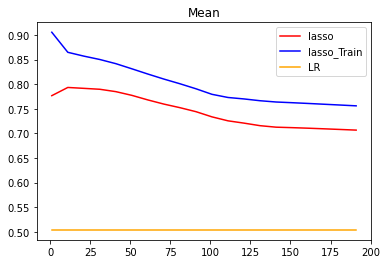

In [20]:

alpharange = np.arange(1,200,10)
lasso, lr, lasso_trian = [], [],[]
for alpha in alpharange:     
    linear = LR().fit(x_train_poly,Ytrain)
    lasso_ploy = Lasso(alpha=alpha, max_iter=100000 ).fit(x_train_poly,Ytrain) 
    regs = lasso_ploy.score(x_test_poly,Ytest)
    regs_train = lasso_ploy.score(x_train_poly,Ytrain)
    linears = linear.score(x_test_poly,Ytest)
    lasso.append(regs)
    lasso_trian.append(regs_train)
    lr.append(linears) 

plt.plot(alpharange,lasso,color="red",label="lasso")
plt.plot(alpharange,lasso_trian,color="blue",label="lasso_Train")
plt.plot(alpharange,lr,color="orange",label="LR") 
plt.title("Mean")
plt.legend() 
plt.show()



In [21]:
lasso_ploy = Lasso(alpha=100).fit(x_train_poly,Ytrain) 

In [22]:
lasso_ploy.score(x_test_poly,Ytest)

0.7346915934626987

In [23]:
lasso_ploy.score(x_train_poly,Ytrain)

0.7803516812981452

In [24]:
(lasso_ploy.coef_ == 0).sum()

87

In [25]:
from scipy.special import comb

comb(13,2) + 13 + 13 + 1

105.0

In [26]:
105 - 87

18

In [27]:
lasso_poly_coef = pd.concat([pd.DataFrame(poly.get_feature_names()), pd.DataFrame(lasso_ploy.coef_)], axis = 1)
lasso_poly_coef.columns = ['feature','coef']

lasso_poly_coef[lasso_poly_coef['coef'] != 0].sort_values(by = 'coef', ascending = False), load_boston().feature_names

(     feature      coef
 75    x5 x11  0.013018
 104    x12^2  0.001842
 93    x8 x11  0.000298
 27      x1^2  0.000141
 35     x1 x9  0.000129
 95      x9^2  0.000035
 97    x9 x11 -0.000009
 80     x6 x9 -0.000012
 102    x11^2 -0.000030
 23     x0 x9 -0.000067
 82    x6 x11 -0.000078
 48    x2 x11 -0.000081
 25    x0 x11 -0.000090
 103  x11 x12 -0.000445
 98    x9 x12 -0.001021
 73     x5 x9 -0.001589
 100  x10 x11 -0.002033
 86     x7 x9 -0.003767,
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))